In [1]:
import pandas as pd

# Load the dataset
file_path = '/Users/kudzanaikutsanzira/Downloads/transformed_data_202411041030.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
data.head()


,country_name,year,investment_in_ict_private,ict_expenditure_percent_gdp,telecom_investment_percent_revenue,mobile_cellular_subscriptions_per_100,internet_users_per_100,fixed_broadband_subscriptions,patent_applications_residents,ict_goods_imports_percent_total,...,broad_money_to_reserves_ratio,broad_money_lcu,broad_money_percent_gdp,credit_to_private_sector_percent_gdp,total_reserves_usd,domestic_credit_percent_gdp,lending_interest_rate_percent,manufacturing_value_added_lcu,inflation_gdp_deflator_percent,personal_remittances_received_usd
0,Angola,2013,1.613949e+08,NaN,NaN,50.809642,NaN,22300.0,-2.092048e+02,3.01,...,1.400303,4.398099e+12,33.331547,21.369582,3.150082e+10,-1.411833e+11,15.808638,5.507500e+10,2.839724,3.663741e+07
1,Angola,2014,-1.144570e+09,NaN,NaN,51.800293,NaN,87800.0,1.460317e+06,2.84,...,1.794403,5.110116e+12,35.675553,19.911137,2.703234e+10,-2.707711e+10,16.382271,4.961300e+10,3.560885,3.097112e+07
2,Angola,2015,2.393707e+08,NaN,NaN,49.362449,NaN,154000.0,1.046375e+06,2.87,...,1.557487,5.711899e+12,40.944660,24.045538,2.379054e+10,2.705092e+01,16.881862,5.557900e+10,-3.518385,1.111471e+07
3,Angola,2016,3.164695e+08,NaN,NaN,44.593508,NaN,84700.0,2.702062e+05,2.30,...,0.872867,6.481192e+12,39.162308,19.990007,2.367219e+10,2.754314e+01,15.780504,6.204700e+10,21.774313,3.988048e+06
4,Angola,2017,2.615886e+08,NaN,NaN,44.106445,NaN,96900.0,7.089990e+07,2.45,...,1.358800,6.521728e+12,32.186521,16.199090,1.745533e+10,2.979625e+01,15.806100,6.277900e+10,22.614437,1.418196e+06


In [10]:
import pandas as pd

# Dropping non-numeric columns and handling missing values by filling with mean values
numeric_data = data.select_dtypes(include=['float64', 'int64']).fillna(data.mean(numeric_only=True))

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Extract and display only high correlations (absolute correlation > 0.5) for focused analysis
high_correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs.index.get_level_values(0) != high_correlation_pairs.index.get_level_values(1)]
significant_correlations = high_correlation_pairs[high_correlation_pairs.abs() > 0.5].drop_duplicates()

# Displaying filtered high correlations
print("\nSignificant Correlations (|correlation| > 0.5):")
print(significant_correlations)


Correlation Matrix:
                                                        year  \
year                                                1.000000   
investment_in_ict_private                          -0.088159   
ict_expenditure_percent_gdp                              NaN   
telecom_investment_percent_revenue                       NaN   
mobile_cellular_subscriptions_per_100               0.141612   
internet_users_per_100                                   NaN   
fixed_broadband_subscriptions                       0.014622   
patent_applications_residents                       0.115588   
ict_goods_imports_percent_total                    -0.183553   
population_total                                    0.050782   
population_growth_percent                          -0.123029   
rural_population_percent                           -0.081666   
time_to_start_business_days                         0.206876   
access_to_electricity_rural_percent                -0.083814   
high_technology_expo

In [11]:
import pandas as pd

# Assuming 'data' is your original dataset
# Drop non-numeric columns and fill missing values with column means
numeric_data = data.select_dtypes(include=['float64', 'int64']).fillna(data.mean(numeric_only=True))

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Flatten the correlation matrix and filter out pairs with correlation <= 0.5
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
# Filter only significant correlations (absolute correlation > 0.5) and remove duplicates
significant_correlations = correlation_pairs[
    (correlation_pairs['Correlation'].abs() > 0.5) &
    (correlation_pairs['Variable 1'] != correlation_pairs['Variable 2'])
].drop_duplicates(subset=['Correlation']).sort_values(by='Correlation', ascending=False)

# Save the significant correlations to a CSV file
significant_correlations.to_csv('significant_correlations.csv', index=False)
print("Significant correlations have been saved to 'significant_correlations.csv'")


Significant correlations have been saved to 'significant_correlations.csv'


In [ ]:
# Dropping rows with missing values for the variables of interest to perform the regression cleanly
data_clean = data[['access_to_electricity_percent', 'mobile_cellular_subscriptions_per_100']].dropna()

# Define the dependent and independent variables for the regression
X = data_clean['access_to_electricity_percent']  # Independent variable
y = data_clean['mobile_cellular_subscriptions_per_100']  # Dependent variable

# Add a constant to the independent variable for the intercept in the regression model
X = sm.add_constant(X)

# Perform the linear regression
model = sm.OLS(y, X).fit()

# Output the summary of the regression analysis
model.summary()

In [12]:
import statsmodels.formula.api as smf

# Since this is a panel data setup, we need to ensure the data includes country identifiers
# Assuming 'country_name' is the column identifying different countries

# Dropping rows with missing values for the variables of interest to perform the regression cleanly
panel_data = data[['country_name', 'access_to_electricity_percent', 'mobile_cellular_subscriptions_per_100']].dropna()

# Fit a fixed-effects panel regression model
# We specify the formula as a linear model with fixed effects for each country
model_fe = smf.ols(formula='mobile_cellular_subscriptions_per_100 ~ access_to_electricity_percent + C(country_name)',
                   data=panel_data).fit()

# Output the summary of the fixed-effects panel regression
model_fe.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     mobile_cellular_subscriptions_per_100   R-squared:                       0.929
Model:                                               OLS   Adj. R-squared:                  0.920
Method:                                    Least Squares   F-statistic:                     115.9
Date:                                   Mon, 04 Nov 2024   Prob (F-statistic):           5.54e-60
Time:                                           13:16:41   Log-Likelihood:                -475.10
No. Observations:                                    130   AIC:                             978.2
Df Residuals:                                        116   BIC:                             1018.
Df Model:                                             13                                         
Covariance Type:                               nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          23.9108      5.820      4.108      0.000      12.384      35.438
C(country_name)[T.Botswana]        86.6077      5.199     16.657      0.000      76.310      96.906
C(country_name)[T.Ghana]           51.7561      6.109      8.473      0.000      39.657      63.855
C(country_name)[T.Kenya]           39.2769      4.744      8.279      0.000      29.881      48.673
C(country_name)[T.Lesotho]         40.6179      4.448      9.132      0.000      31.808      49.428
C(country_name)[T.Malawi]          13.8371      5.640      2.453      0.016       2.666      25.008
C(country_name)[T.Namibia]         62.3126      4.538     13.733      0.000      53.325      71.300
C(country_name)[T.Nigeria]         29.8542      4.674      6.388      0.000      20.597      39.111
C(country_name)[T.Rwanda]          30.6398      4.523      6.774      0.000      21.681      39.599
C(country_name)[T.South Africa]    84.6692      6.582     12.864      0.000      71.633      97.705
C(country_name)[T.Uganda]          17.1975      4.578      3.757      0.000       8.130      26.264
C(country_name)[T.Zambia]          37.8186      4.457      8.485      0.000      28.991      46.646
C(country_name)[T.Zimbabwe]        40.5534      4.428      9.157      0.000      31.782      49.325
access_to_electricity_percent       0.5687      0.114      5.004      0.000       0.344       0.794
==============================================================================
Omnibus:                        0.506   Durbin-Watson:                   0.777
Prob(Omnibus):                  0.777   Jarque-Bera (JB):                0.408
Skew:                           0.137   Prob(JB):                        0.815
Kurtosis:                       2.983   Cond. No.                         740.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

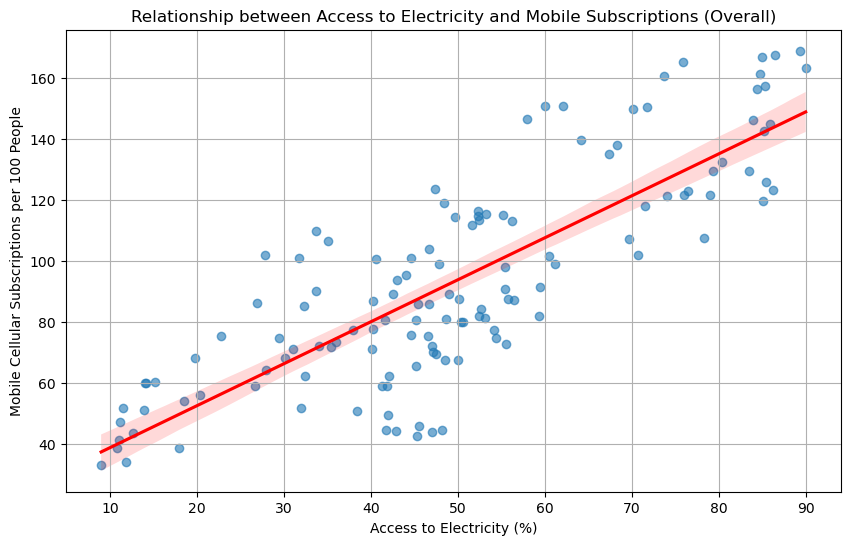

In [13]:

# Without controlling for country fixed effects
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a scatter plot with regression line for the overall relationship between electricity access and mobile subscriptions
plt.figure(figsize=(10, 6))
sns.regplot(x="access_to_electricity_percent", y="mobile_cellular_subscriptions_per_100", data=panel_data, 
            scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
plt.title("Relationship between Access to Electricity and Mobile Subscriptions (Overall)")
plt.xlabel("Access to Electricity (%)")
plt.ylabel("Mobile Cellular Subscriptions per 100 People")
plt.grid(True)
plt.show()


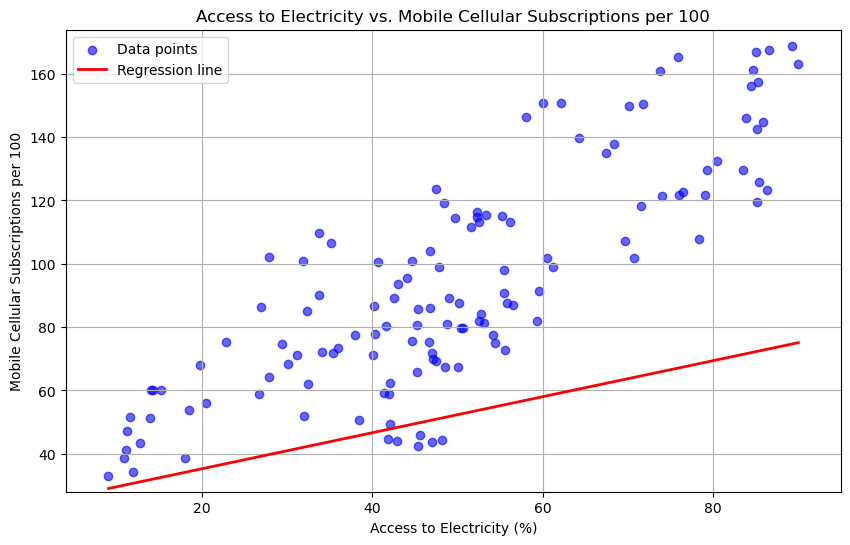

In [24]:
# With country fixed effects controlled
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot for access to electricity vs. mobile cellular subscriptions
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(data['access_to_electricity_percent'], data['mobile_cellular_subscriptions_per_100'], color='blue', alpha=0.6, label='Data points')

# Regression line
slope = model_fe.params['access_to_electricity_percent']
intercept = model_fe.params['Intercept']
x_vals = np.linspace(data['access_to_electricity_percent'].min(), data['access_to_electricity_percent'].max(), 100)
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red', label='Regression line', linewidth=2)

# Labels and title
plt.title('Access to Electricity vs. Mobile Cellular Subscriptions per 100')
plt.xlabel('Access to Electricity (%)')
plt.ylabel('Mobile Cellular Subscriptions per 100')
plt.legend()
plt.grid(True)
plt.xlim(data['access_to_electricity_percent'].min() - 5, data['access_to_electricity_percent'].max() + 5)
plt.ylim(data['mobile_cellular_subscriptions_per_100'].min() - 5, data['mobile_cellular_subscriptions_per_100'].max() + 5)

# Show plot
plt.show()


/var/folders/r_/l5qrwcxs1mj5p7h8037l8hk80000gn/T/ipykernel_24898/432450995.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='electricity_access_category', y='mobile_cellular_subscriptions_per_100', data=data_clean, palette=["#FFB347", "#FF8000", "#FF6347", "#FF69B4"])


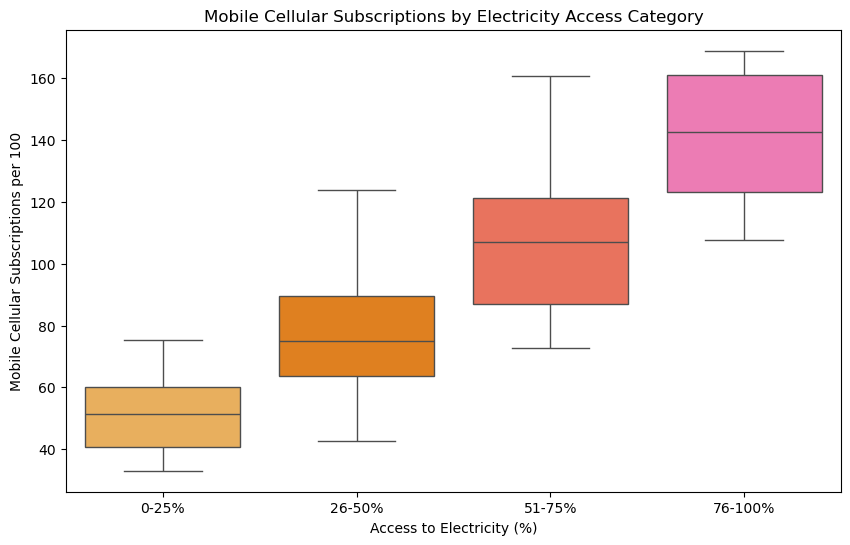

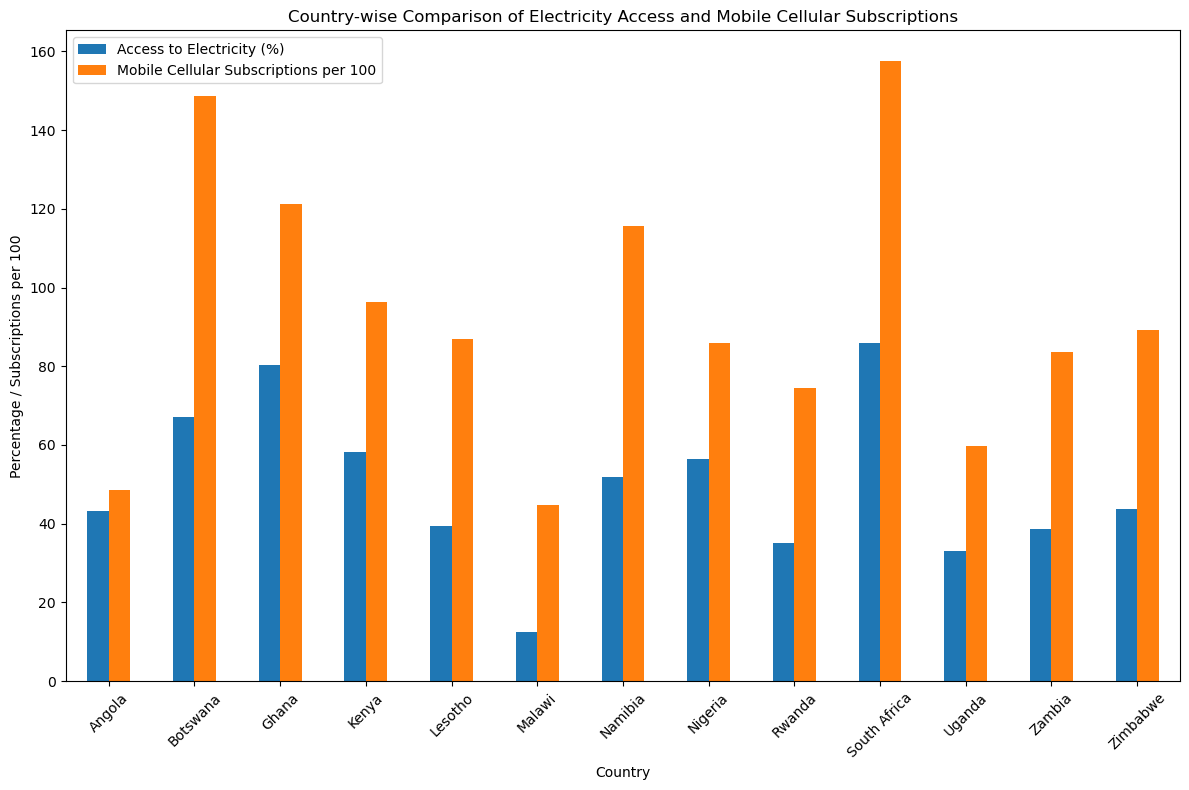

In [25]:
# Re-import necessary libraries for a fresh environment
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for box plot by categorizing access to electricity into bins
data_clean = data[['country_name', 'access_to_electricity_percent', 'mobile_cellular_subscriptions_per_100']].dropna()
data_clean['electricity_access_category'] = pd.cut(
    data_clean['access_to_electricity_percent'],
    bins=[0, 25, 50, 75, 100],
    labels=['0-25%', '26-50%', '51-75%', '76-100%']
)

# Box Plot: Mobile Cellular Subscriptions by Electricity Access Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='electricity_access_category', y='mobile_cellular_subscriptions_per_100', data=data_clean, palette=["#FFB347", "#FF8000", "#FF6347", "#FF69B4"])
plt.title("Mobile Cellular Subscriptions by Electricity Access Category")
plt.xlabel("Access to Electricity (%)")
plt.ylabel("Mobile Cellular Subscriptions per 100")
plt.show()

# Bar Plot: Country-wise comparison of access to electricity and mobile cellular subscriptions
country_means = data.groupby('country_name')[['access_to_electricity_percent', 'mobile_cellular_subscriptions_per_100']].mean()

# Plot the bar plot
country_means.plot(kind='bar', figsize=(12, 8))
plt.title("Country-wise Comparison of Electricity Access and Mobile Cellular Subscriptions")
plt.xlabel("Country")
plt.ylabel("Percentage / Subscriptions per 100")
plt.legend(["Access to Electricity (%)", "Mobile Cellular Subscriptions per 100"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
import pandas as pd
import statsmodels.api as sm



# Drop missing values for relevant columns
datadf = data[['private_sector_gross_fixed_capital_formation_percent_gdp', 'gross_fixed_capital_formation_growth_percent']].dropna()

# Define independent and dependent variables
X = datadf['private_sector_gross_fixed_capital_formation_percent_gdp']  # Independent variable
y = datadf['gross_fixed_capital_formation_growth_percent']  # Dependent variable

# Add a constant to the independent variable
X = sm.add_constant(X)

# Perform the linear regression
model = sm.OLS(y, X).fit()

# Output the summary of the regression analysis
print(model.summary())


                                         OLS Regression Results                                         
Dep. Variable:     gross_fixed_capital_formation_growth_percent   R-squared:                       1.000
Model:                                                      OLS   Adj. R-squared:                  1.000
Method:                                           Least Squares   F-statistic:                 4.424e+06
Date:                                          Mon, 04 Nov 2024   Prob (F-statistic):          2.38e-292
Time:                                                  16:01:27   Log-Likelihood:                -3425.6
No. Observations:                                           130   AIC:                             6855.
Df Residuals:                                               128   BIC:                             6861.
Df Model:                                                     1                                         
Covariance Type:                                      n

In [31]:

# Drop missing values for relevant columns
data_df1 = data[['lending_interest_rate_percent', 'private_sector_gross_fixed_capital_formation_percent_gdp',
                   'inflation_gdp_deflator_percent', 'gdp_constant_lcu']].dropna()

# Define independent variables (interest rate, inflation, and GDP) and the dependent variable
X = data_df1[['lending_interest_rate_percent', 'inflation_gdp_deflator_percent', 'gdp_constant_lcu']]
y = data_df1['private_sector_gross_fixed_capital_formation_percent_gdp']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Perform the regression analysis
model = sm.OLS(y, X).fit()

# Output the summary of the regression analysis
print(model.summary())


                                               OLS Regression Results                                               
Dep. Variable:     private_sector_gross_fixed_capital_formation_percent_gdp   R-squared:                       0.369
Model:                                                                  OLS   Adj. R-squared:                  0.354
Method:                                                       Least Squares   F-statistic:                     24.58
Date:                                                      Mon, 04 Nov 2024   Prob (F-statistic):           1.37e-12
Time:                                                              16:23:23   Log-Likelihood:                -4067.1
No. Observations:                                                       130   AIC:                             8142.
Df Residuals:                                                           126   BIC:                             8154.
Df Model:                                                       

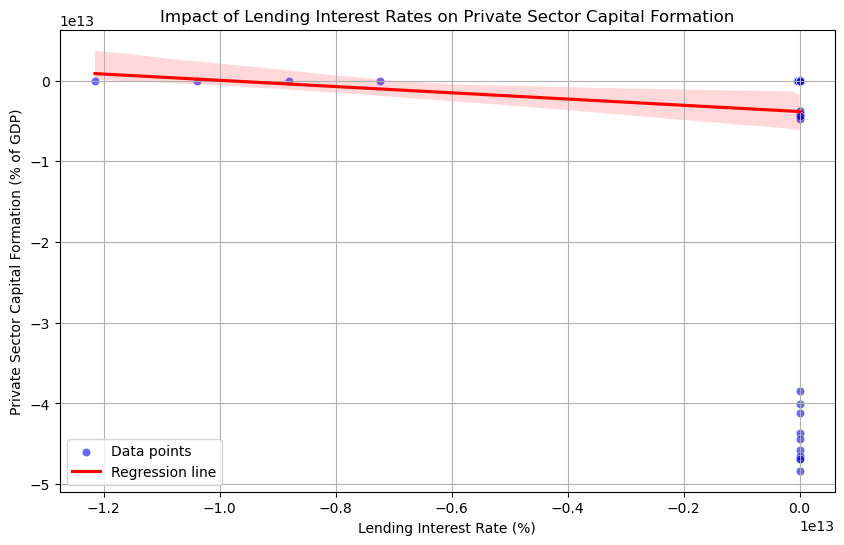

In [32]:
# Scatter plot with regression line for lending interest rate vs. private sector capital formation

import matplotlib.pyplot as plt
import seaborn as sns

# Extract the relevant data for plotting
x = data['lending_interest_rate_percent']
y = data['private_sector_gross_fixed_capital_formation_percent_gdp']

# Set up the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, color='blue', alpha=0.6, label='Data points')

# Fit a regression line
sns.regplot(x=x, y=y, scatter=False, color='red', label='Regression line')

# Titles and labels
plt.title('Impact of Lending Interest Rates on Private Sector Capital Formation')
plt.xlabel('Lending Interest Rate (%)')
plt.ylabel('Private Sector Capital Formation (% of GDP)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


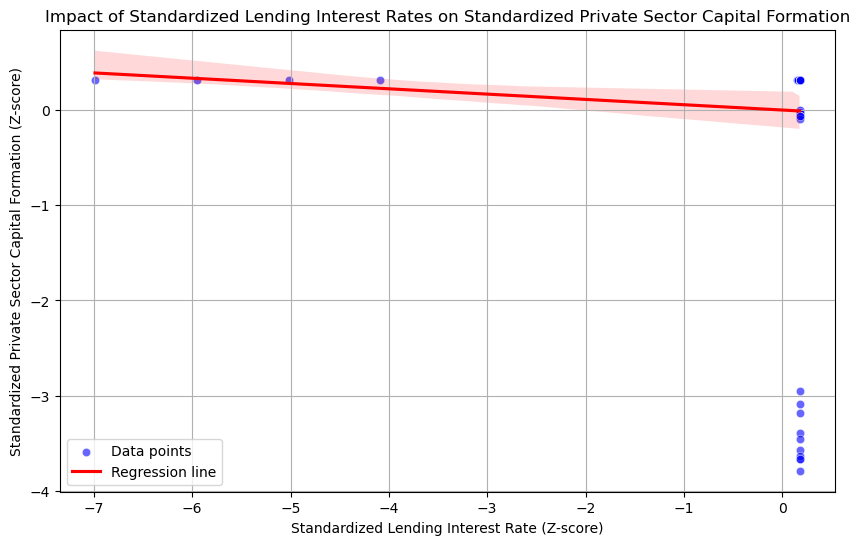

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Standardize the variables to have mean 0 and standard deviation 1
data['lending_interest_rate_z'] = zscore(data['lending_interest_rate_percent'])
data['private_sector_capital_formation_z'] = zscore(data['private_sector_gross_fixed_capital_formation_percent_gdp'])

# Re-plotting the scatter plot with standardized values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['lending_interest_rate_z'], y=data['private_sector_capital_formation_z'], 
                color='blue', alpha=0.6, label='Data points')

# Fit a regression line with standardized values
sns.regplot(x=data['lending_interest_rate_z'], y=data['private_sector_capital_formation_z'], 
            scatter=False, color='red', label='Regression line')

# Titles and labels
plt.title('Impact of Standardized Lending Interest Rates on Standardized Private Sector Capital Formation')
plt.xlabel('Standardized Lending Interest Rate (Z-score)')
plt.ylabel('Standardized Private Sector Capital Formation (Z-score)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


  country_name  year  access_to_electricity_percent  \
0       Angola  2013                           38.4   
1       Angola  2014                           32.0   
2       Angola  2015                           42.0   
3       Angola  2016                           41.8   
4       Angola  2017                           42.9   

   mobile_cellular_subscriptions_per_100  gdp_constant_lcu  
0                              50.809642      1.534766e+12  
1                              51.800293      1.608781e+12  
2                              49.362449      1.623961e+12  
3                              44.593508      1.582061e+12  
4                              44.106445      1.579733e+12  


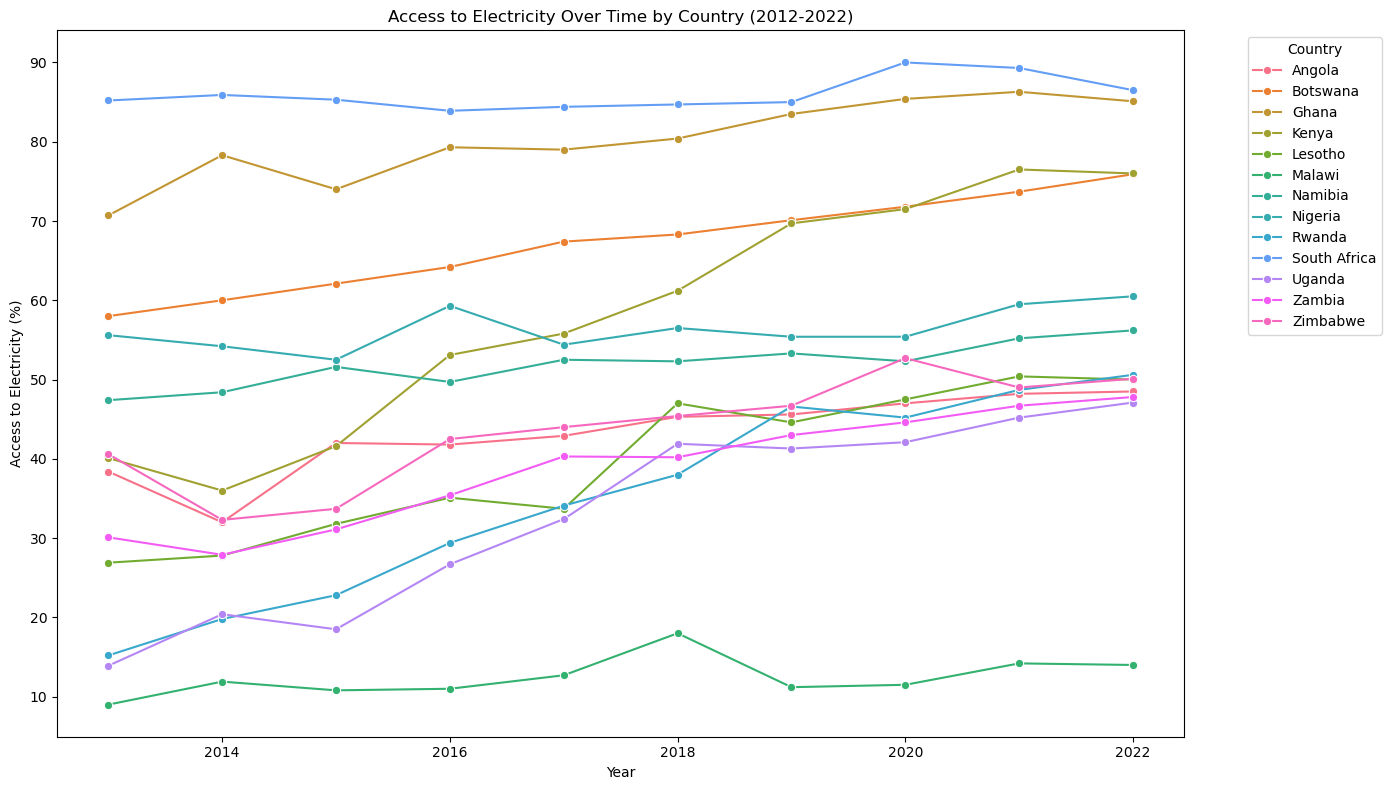

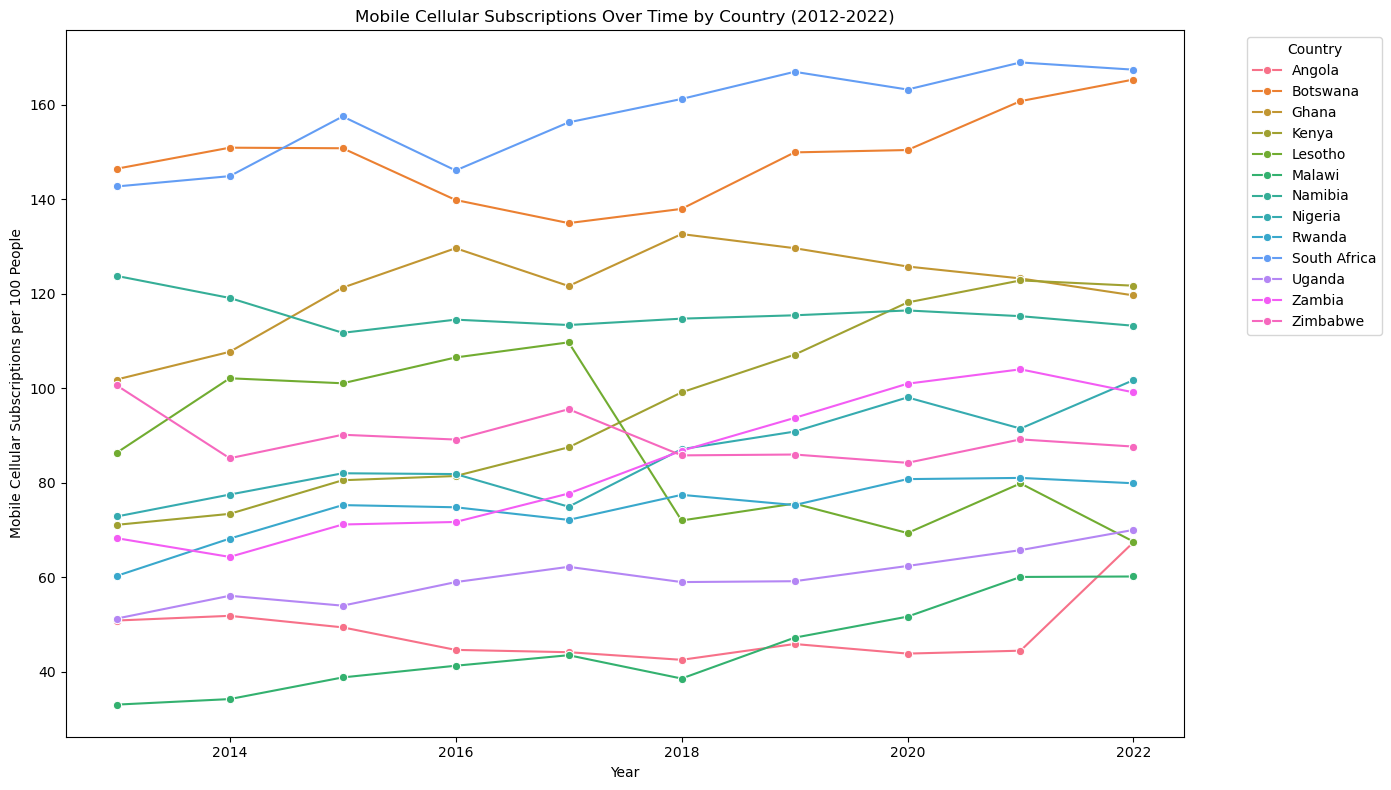

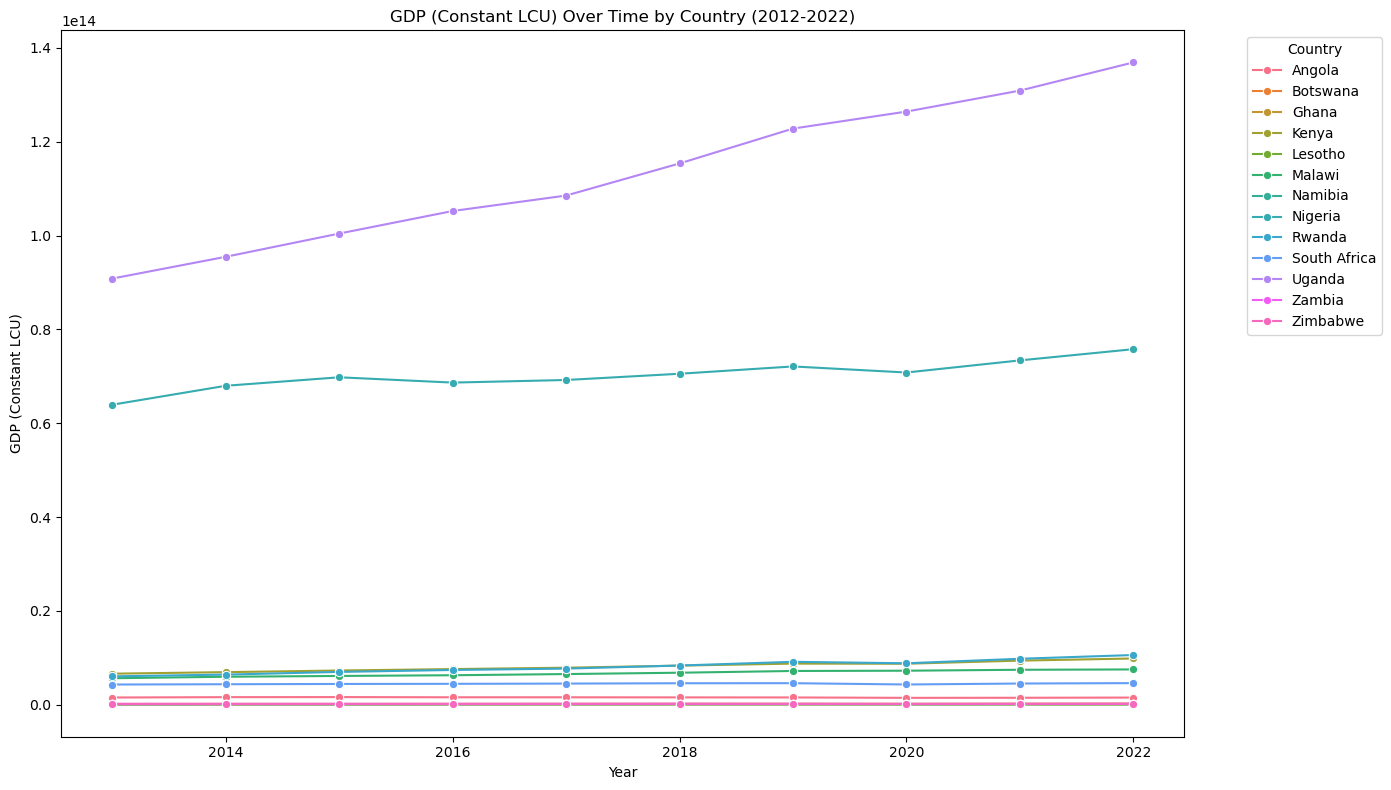

In [37]:
import pandas as pd


# Filter the data to include only the years 2012 to 2022
data_filtered = data[(data['year'] >= 2012) & (data['year'] <= 2022)]

# Select relevant columns
columns_of_interest = ['country_name', 'year', 'access_to_electricity_percent', 
                       'mobile_cellular_subscriptions_per_100', 'gdp_constant_lcu']
data_filtered = data_filtered[columns_of_interest]

# Display the first few rows to verify
print(data_filtered.head())

# 1. Plot time series for each country
plt.figure(figsize=(14, 8))
sns.lineplot(data=data_filtered, x='year', y='access_to_electricity_percent', hue='country_name', marker='o')
plt.title('Access to Electricity Over Time by Country (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Access to Electricity (%)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. Mobile cellular subscriptions over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=data_filtered, x='year', y='mobile_cellular_subscriptions_per_100', hue='country_name', marker='o')
plt.title('Mobile Cellular Subscriptions Over Time by Country (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Mobile Cellular Subscriptions per 100 People')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. GDP over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=data_filtered, x='year', y='gdp_constant_lcu', hue='country_name', marker='o')
plt.title('GDP (Constant LCU) Over Time by Country (2012-2022)')
plt.xlabel('Year')
plt.ylabel('GDP (Constant LCU)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [38]:
import pandas as pd

# Calculate growth rates by country for electricity, mobile subscriptions, and GDP from 2012 to 2022
growth_data = data_filtered.groupby('country_name').apply(lambda x: pd.Series({
    'electricity_growth': x['access_to_electricity_percent'].iloc[-1] - x['access_to_electricity_percent'].iloc[0],
    'mobile_subscriptions_growth': x['mobile_cellular_subscriptions_per_100'].iloc[-1] - x['mobile_cellular_subscriptions_per_100'].iloc[0],
    'gdp_growth': x['gdp_constant_lcu'].iloc[-1] - x['gdp_constant_lcu'].iloc[0]
}))

# Sort data by each growth category to identify high-growth and low-growth countries
high_low_growth = growth_data.sort_values(by=['electricity_growth', 'mobile_subscriptions_growth', 'gdp_growth'], ascending=False)

# Display the sorted growth data
print(high_low_growth)


              electricity_growth  mobile_subscriptions_growth    gdp_growth
country_name                                                               
Kenya                       35.9                    50.612335  3.241017e+12
Rwanda                      35.4                    19.604694  4.541692e+12
Uganda                      33.2                    18.761968  4.605487e+13
Lesotho                     23.1                   -18.805573 -4.970550e+08
Botswana                    17.9                    18.873760  4.550772e+10
Zambia                      17.7                    30.866006  3.801423e+10
Ghana                       14.4                    17.804692  5.677957e+10
Angola                      10.1                    16.563833 -1.152000e+10
Zimbabwe                     9.5                   -12.949028  2.760343e+10
Namibia                      8.8                   -10.545357  1.330971e+10
Malawi                       5.0                    27.115604  1.872627e+12
Nigeria     

/var/folders/r_/l5qrwcxs1mj5p7h8037l8hk80000gn/T/ipykernel_24898/4267340369.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  growth_data = data_filtered.groupby('country_name').apply(lambda x: pd.Series({


/var/folders/r_/l5qrwcxs1mj5p7h8037l8hk80000gn/T/ipykernel_24898/1520808409.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=growth_data, x='country_name', y='electricity_growth', palette='viridis')


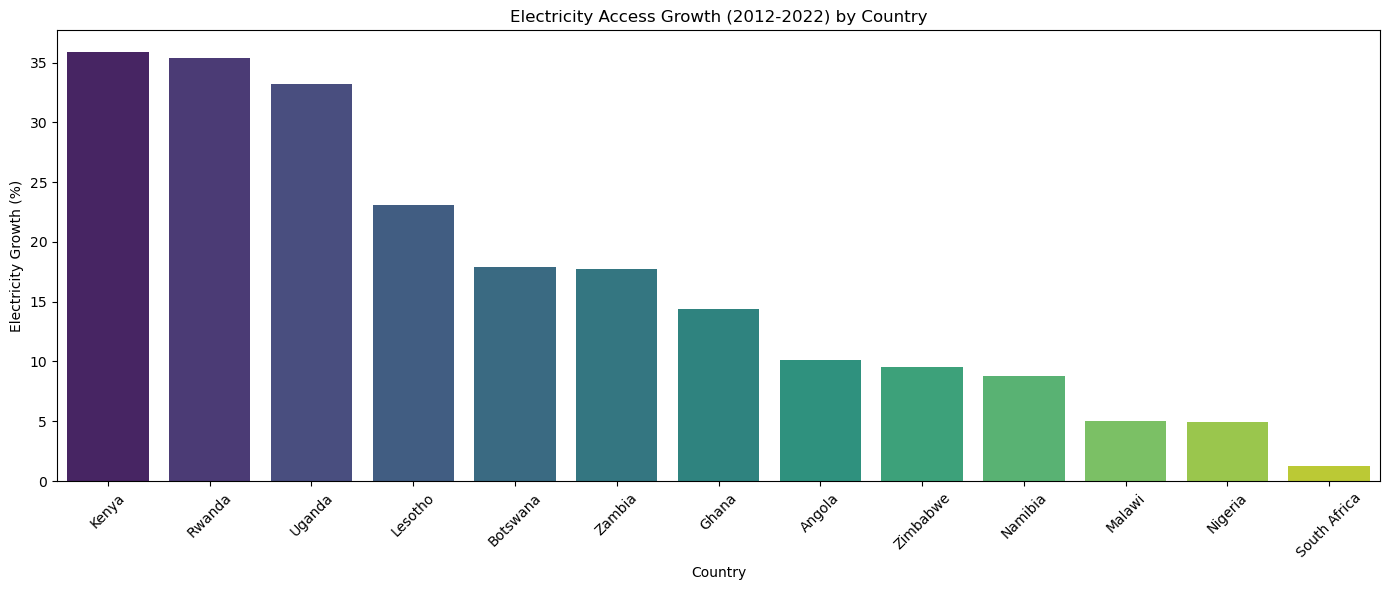

/var/folders/r_/l5qrwcxs1mj5p7h8037l8hk80000gn/T/ipykernel_24898/1520808409.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=growth_data, x='country_name', y='mobile_subscriptions_growth', palette='plasma')


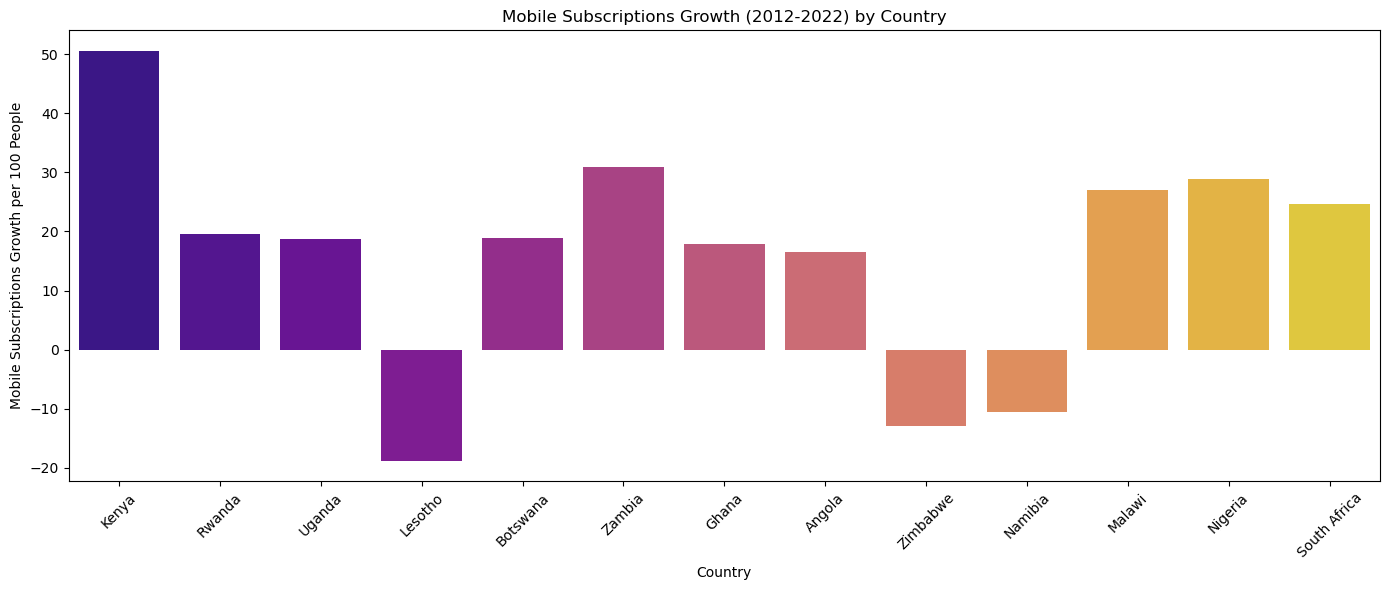

/var/folders/r_/l5qrwcxs1mj5p7h8037l8hk80000gn/T/ipykernel_24898/1520808409.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=growth_data, x='country_name', y='gdp_growth', palette='cividis')


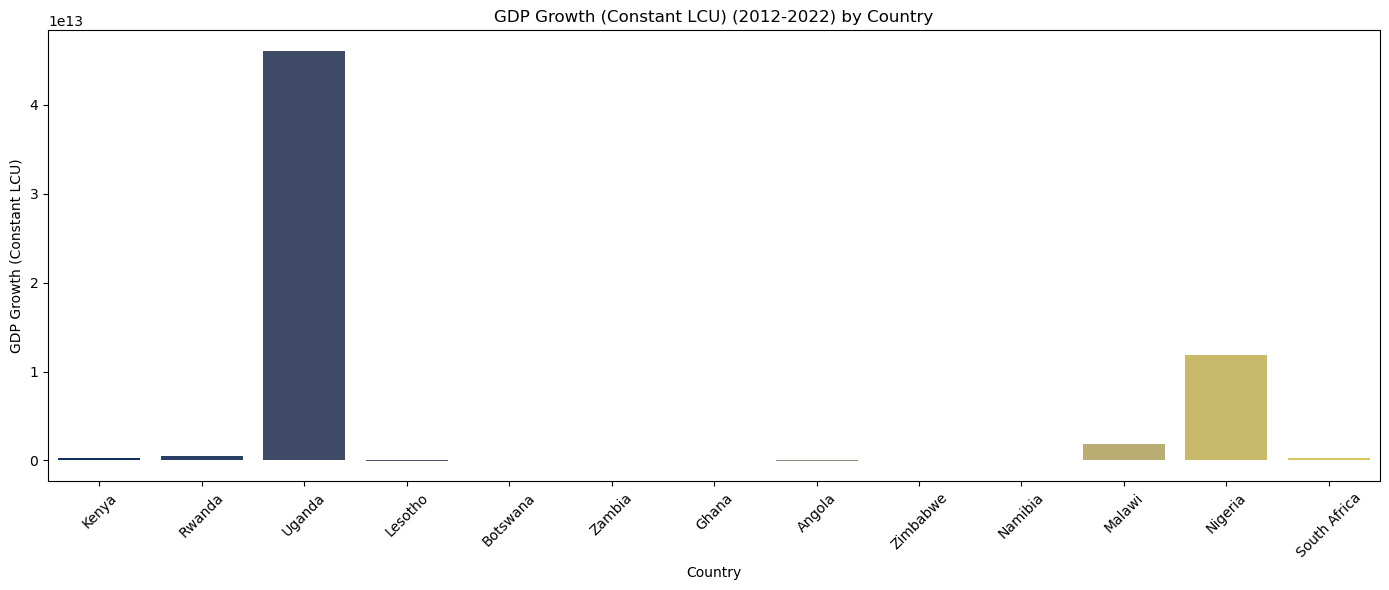

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for high-growth vs. low-growth countries
growth_data = pd.DataFrame({
    "country_name": ["Kenya", "Rwanda", "Uganda", "Lesotho", "Botswana", "Zambia", "Ghana", "Angola", "Zimbabwe", 
                     "Namibia", "Malawi", "Nigeria", "South Africa"],
    "electricity_growth": [35.9, 35.4, 33.2, 23.1, 17.9, 17.7, 14.4, 10.1, 9.5, 8.8, 5.0, 4.9, 1.3],
    "mobile_subscriptions_growth": [50.6, 19.6, 18.8, -18.8, 18.9, 30.9, 17.8, 16.6, -12.9, -10.5, 27.1, 28.9, 24.7],
    "gdp_growth": [324107000000.0, 454169200000.0, 46054872929800.0, -4975000000.0, 45507718000.0, 38014229222.7, 
                   56779572200.0, -11520000000.0, 27603427700.0, 1330979060.0, 1872626860600.0, 11826099759000.0, 
                   296970213100.0]
})

# Plot 1: Electricity Growth
plt.figure(figsize=(14, 6))
sns.barplot(data=growth_data, x='country_name', y='electricity_growth', palette='viridis')
plt.title('Electricity Access Growth (2012-2022) by Country')
plt.xlabel('Country')
plt.ylabel('Electricity Growth (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Mobile Subscriptions Growth
plt.figure(figsize=(14, 6))
sns.barplot(data=growth_data, x='country_name', y='mobile_subscriptions_growth', palette='plasma')
plt.title('Mobile Subscriptions Growth (2012-2022) by Country')
plt.xlabel('Country')
plt.ylabel('Mobile Subscriptions Growth per 100 People')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 3: GDP Growth
plt.figure(figsize=(14, 6))
sns.barplot(data=growth_data, x='country_name', y='gdp_growth', palette='cividis')
plt.title('GDP Growth (Constant LCU) (2012-2022) by Country')
plt.xlabel('Country')
plt.ylabel('GDP Growth (Constant LCU)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
